In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import random
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(50)

In [2]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")


In [3]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [4]:
filt=ca_2019_data[["Population","House Value",'Monthly Owner Cost','Monthly Rent']]>0
ca_2019_data=ca_2019_data[filt.all(1)]
ca_2019_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


### *box plot for House value and monthly rent in different counties in CA in 2019*

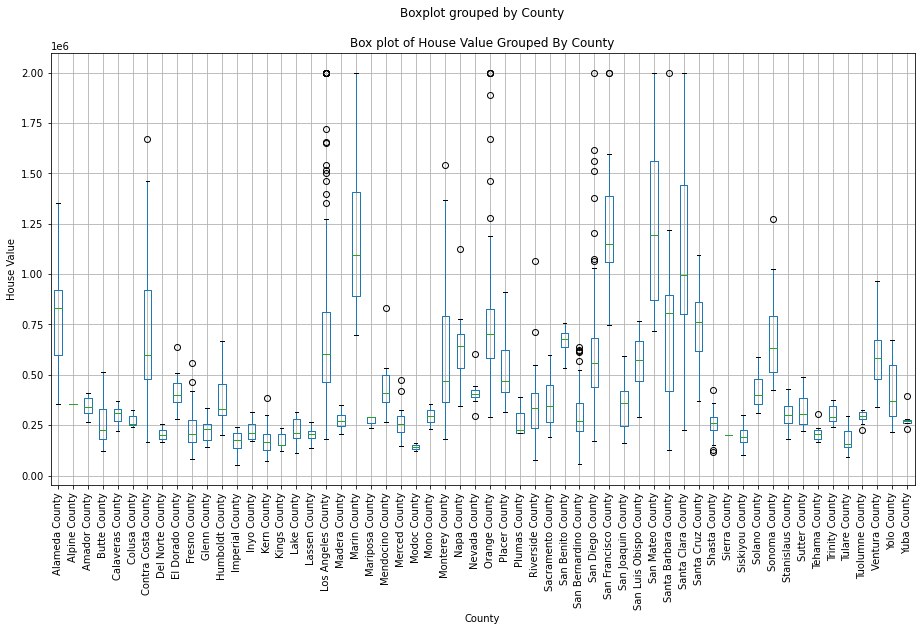

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Box plot of House Value Grouped By County')
ca_2019_data.boxplot(column=["House Value"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("House Value")
ax.set_title('Box plot of House Value Grouped By County')
plt.show()

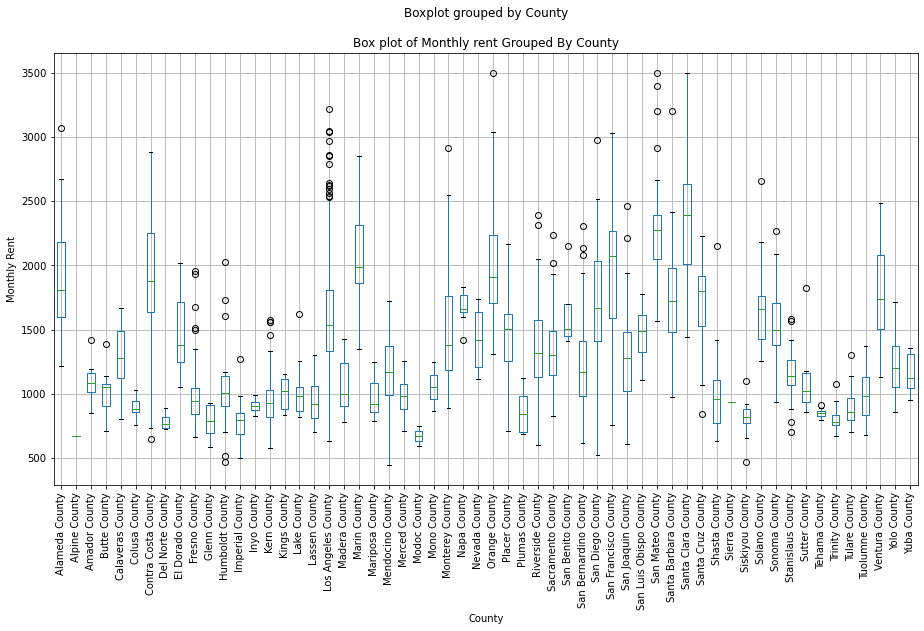

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Box plot of Monthly Rent Grouped By County')
ca_2019_data.boxplot(column=["Monthly Rent"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Monthly Rent")
ax.set_title('Box plot of Monthly rent Grouped By County')
plt.show()

### *Taking Samples from CA-2019 data*

In [7]:
sample_set=[ca_2019_data.sample(200, axis=0) for x in range (0,10)]

### *Generating errorbar plot to see variation of house values*

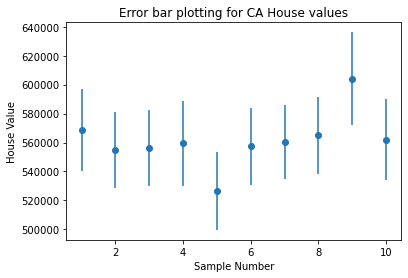

In [8]:
means=[sample["House Value"].mean() for sample in sample_set]
std_errors=[sem(sample["House Value"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("House Value")
ax.set_title("Error bar plotting for CA House values")
plt.show()

### *Generating errorbar plot to see variation in Monthly Rent*

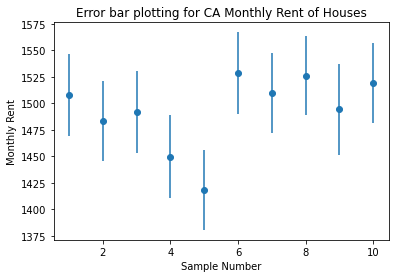

In [9]:
means=[sample["Monthly Rent"].mean() for sample in sample_set]
std_errors=[sem(sample["Monthly Rent"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Monthly Rent")
ax.set_title("Error bar plotting for CA Monthly Rent of Houses")
plt.show()

In [10]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [11]:
ca_data=ca_2019_data[["Population",'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate',"Housing_units"]]

In [12]:
ca_data_corr=ca_data.corr()
print(ca_data_corr.unstack().sort_values())

Public Transport Rate    Personal Transport Rate   -0.727316
Personal Transport Rate  Public Transport Rate     -0.727316
High School Rate         Monthly Owner Cost        -0.666636
Monthly Owner Cost       High School Rate          -0.666636
White Population Rate    Asian Population Rate     -0.663185
                                                      ...   
Uneducated Rate          Uneducated Rate            1.000000
White Population Rate    White Population Rate      1.000000
Black Population Rate    Black Population Rate      1.000000
Public Transport Rate    Public Transport Rate      1.000000
Housing_units            Housing_units              1.000000
Length: 441, dtype: float64


In [13]:
ca_data_corr.style.background_gradient(cmap='coolwarm')

,Population,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Personal Transport Rate,Commute Time Public,Commute Time Car,High School Rate,College Rate,Uneducated Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Housing_units
Population,1.000000,0.074149,-0.106408,-0.067741,0.014868,0.053006,0.022573,0.123565,0.211153,0.184499,0.056704,0.523142,0.918987,-0.145082,-0.031644,0.303507,-0.476247,0.250952,0.317265,0.317442,0.933892
Household Income,0.074149,1.000000,0.018207,-0.062168,0.025888,0.052611,-0.001713,0.058325,0.046365,0.016106,0.011405,0.107123,0.054841,-0.038874,-0.047165,0.040802,-0.085057,0.034930,0.027793,0.045161,0.078124
Per Capita Income,-0.106408,0.018207,1.000000,-0.576376,-0.358102,0.866762,-0.010162,0.829898,0.720438,0.258760,-0.246472,0.143088,-0.158068,-0.611392,0.817699,-0.419178,0.152685,-0.139517,-0.586880,0.252449,0.039304
Poverty Rate,-0.067741,-0.062168,-0.576376,1.000000,0.470605,-0.495771,0.036174,-0.585237,-0.636639,-0.000933,-0.111250,-0.150479,-0.178295,0.340806,-0.571184,0.391062,-0.100783,0.148427,0.440857,-0.245088,-0.118511
Unemployment Rate,0.014868,0.025888,-0.358102,0.470605,1.000000,-0.314786,0.011848,-0.368345,-0.367424,-0.011688,-0.054569,-0.039722,-0.036269,0.178887,-0.345765,0.255123,-0.119428,0.147067,0.338259,-0.135604,-0.021863
House Value,0.053006,0.052611,0.866762,-0.495771,-0.314786,1.000000,-0.015010,0.909355,0.742997,0.340795,-0.305340,0.229483,-0.014578,-0.643422,0.739350,-0.237085,-0.056937,-0.082091,-0.406808,0.383142,0.156710
House Construction Year,0.022573,-0.001713,-0.010162,0.036174,0.011848,-0.015010,1.000000,-0.021602,-0.061284,0.003888,-0.005144,-0.050226,0.102281,0.013823,-0.017973,-0.019099,0.009285,0.011115,0.004363,-0.017918,0.025863
Monthly Owner Cost,0.123565,0.058325,0.829898,-0.585237,-0.368345,0.909355,-0.021602,1.000000,0.810405,0.373499,-0.286633,0.288391,0.054799,-0.666636,0.806400,-0.269226,-0.100054,-0.045797,-0.433700,0.438258,0.227982
Monthly Rent,0.211153,0.046365,0.720438,-0.636639,-0.367424,0.742997,-0.061284,0.810405,1.000000,0.210392,-0.097879,0.323918,0.200801,-0.631938,0.684912,-0.251535,-0.174846,-0.036723,-0.364615,0.515634,0.252110
Public Transport Rate,0.184499,0.016106,0.258760,-0.000933,-0.011688,0.340795,0.003888,0.373499,0.210392,1.000000,-0.727316,0.267551,-0.043978,-0.283980,0.330270,0.143847,-0.362841,0.242089,-0.066484,0.357881,0.249677


In [14]:
ca_data_2012=pd.read_csv("output_census/census_ca_2012.csv")
ca_data_2019=pd.read_csv("output_census/census_ca_2019.csv")
ca_data_2014=pd.read_csv("output_census/census_ca_2014.csv")
ca_data_2015=pd.read_csv("output_census/census_ca_2015.csv")
ca_data_2017=pd.read_csv("output_census/census_ca_2017.csv")

In [15]:
merge1=pd.merge(ca_data_2019,ca_data_2017,how="inner",left_on=['Lat', 'Lng'],right_on=['Lat', 'Lng'],suffixes=("2019","2017"))
merge1.columns

Index(['Zipcode2019', 'Population2019', 'Median Age2019',
       'Household Income2019', 'Per Capita Income2019', 'Poverty Rate2019',
       'Unemployment Rate2019', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'Public Transport Rate2019',
       'Personal Transport Rate2019', 'Commute Time Public2019',
       'Commute Time Car2019', 'High School Rate2019', 'College Rate2019',
       'Uneducated Rate2019', 'English Language2019', 'Spanish Language2019',
       'White Population Rate2019', 'Black Population Rate2019',
       'Hispanic Population Rate2019', 'Asian Population Rate2019', 'City2019',
       'County2019', 'Lat', 'Lng', 'Housing_units2019', 'State2019',
       'Zipcode2017', 'Population2017', 'Median Age2017',
       'Household Income2017', 'Per Capita Income2017', 'Poverty Rate2017',
       'Unemployment Rate2017', 'House Value2017',
       'House Construction Year2017', 'Monthly Owner Cost2017',
       'Monthl

In [16]:
merge1=merge1[['Zipcode2019','City2019','County2019','Lat', 'Lng',
               'House Value2019','House Construction Year2019', 'Monthly Owner Cost2019',
               'Monthly Rent2019', 'House Value2017','House Construction Year2017',
               'Monthly Owner Cost2017','Monthly Rent2017']]

In [17]:
merge1.rename(columns={"Zipcode2019":"Zipcode","City2019":"City","County2019":"County"},inplace=True)

In [18]:
merge2=pd.merge(merge1,ca_data_2015,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 
merge2.columns

Index(['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'Zipcode_y', 'Population',
       'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Rate',
       'Unemployment Rate', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent', 'Public Transport Rate',
       'Personal Transport Rate', 'Commute Time Public', 'Commute Time Car',
       'High School Rate', 'College Rate', 'Uneducated Rate',
       'English Language Rate', 'Spanish Language Rate',
       'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City_y',
       'County_y', 'Housing_units', 'State'],
      dtype='object')

In [19]:
merge2=merge2[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [20]:
merge2.rename(columns={"Zipcode_x":"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2015", 'House Construction Year':'House Construction Year2015',
       'Monthly Owner Cost':'Monthly Owner Cost2015', 'Monthly Rent':'Monthly Rent2015'},inplace=True)

In [21]:
merge3=pd.merge(merge2,ca_data_2014,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 
merge3.columns

Index(['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'Zipcode_y', 'Population', 'Median Age',
       'Household Income', 'Per Capita Income', 'Poverty Rate',
       'Unemployment Rate', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent', 'Public Transport Rate',
       'Personal Transport Rate', 'Commute Time Public', 'Commute Time Car',
       'High School Rate', 'College Rate', 'Uneducated Rate',
       'English Language Rate', 'Spanish Language Rate',
       'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City_y',
       'County_y', 'Housing_units', 'State'],
      d

In [22]:
merge3=merge3[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [23]:
merge3.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2014",'House Construction Year':'House Construction Year2014',
       'Monthly Owner Cost':"Monthly Owner Cost2014", 'Monthly Rent':'Monthly Rent2014'},inplace=True)

In [24]:
merge4=pd.merge(merge3,ca_data_2012,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 
merge4.columns

Index(['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'Zipcode_y', 'Population',
       'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Rate',
       'Unemployment Rate', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent', 'Public Transport Rate',
       'Personal Transport Rate', 'Commute Time Public', 'Commute Time Car',
       'High School Rate', 'College Rate', 'Uneducated Rate',
       'English Language Rate', 'Spanish Language Rate',
       'White Population Rate', 'Black Population Rate',
       'Hispanic Pop

In [25]:
merge4=merge4[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014','House Value','House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [26]:
merge4.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':'House Value2012','House Construction Year':'House Construction Year2012',
       'Monthly Owner Cost':'Monthly Owner Cost2012', 'Monthly Rent':'Monthly Rent2012'},inplace=True)
merge4.head()

,Zipcode,City,County,Lat,Lng,House Value2019,House Construction Year2019,Monthly Owner Cost2019,Monthly Rent2019,House Value2017,...,Monthly Owner Cost2015,Monthly Rent2015,House Value2014,House Construction Year2014,Monthly Owner Cost2014,Monthly Rent2014,House Value2012,House Construction Year2012,Monthly Owner Cost2012,Monthly Rent2012
0,90001,Los Angeles,Los Angeles County,33.97,-118.25,359000.0,1949,1853.0,1150.0,305500.0,...,1637.0,984.0,241800.0,1951.0,1649.0,975.0,263100.0,1950.0,1650.0,950.0
1,90002,Los Angeles,Los Angeles County,33.95,-118.25,345900.0,1954,1813.0,1187.0,272400.0,...,1619.0,991.0,218800.0,1951.0,1633.0,968.0,238300.0,1952.0,1801.0,940.0
2,90003,Los Angeles,Los Angeles County,33.96,-118.27,362800.0,1954,1892.0,1212.0,300700.0,...,1675.0,1075.0,228600.0,1949.0,1683.0,1064.0,248400.0,1951.0,1834.0,999.0
3,90004,Los Angeles,Los Angeles County,34.08,-118.31,1063200.0,1946,3489.0,1307.0,918500.0,...,3490.0,1090.0,724900.0,1949.0,3578.0,1070.0,818400.0,1950.0,3636.0,1040.0
4,90005,Los Angeles,Los Angeles County,34.06,-118.31,777100.0,1950,3149.0,1235.0,713400.0,...,3103.0,952.0,635500.0,1953.0,3252.0,939.0,664400.0,1954.0,3150.0,920.0


In [27]:
filt=merge4.iloc[:,5:]>0
combined=merge4[filt.all(1)]
combined.head()

,Zipcode,City,County,Lat,Lng,House Value2019,House Construction Year2019,Monthly Owner Cost2019,Monthly Rent2019,House Value2017,...,Monthly Owner Cost2015,Monthly Rent2015,House Value2014,House Construction Year2014,Monthly Owner Cost2014,Monthly Rent2014,House Value2012,House Construction Year2012,Monthly Owner Cost2012,Monthly Rent2012
0,90001,Los Angeles,Los Angeles County,33.97,-118.25,359000.0,1949,1853.0,1150.0,305500.0,...,1637.0,984.0,241800.0,1951.0,1649.0,975.0,263100.0,1950.0,1650.0,950.0
1,90002,Los Angeles,Los Angeles County,33.95,-118.25,345900.0,1954,1813.0,1187.0,272400.0,...,1619.0,991.0,218800.0,1951.0,1633.0,968.0,238300.0,1952.0,1801.0,940.0
2,90003,Los Angeles,Los Angeles County,33.96,-118.27,362800.0,1954,1892.0,1212.0,300700.0,...,1675.0,1075.0,228600.0,1949.0,1683.0,1064.0,248400.0,1951.0,1834.0,999.0
3,90004,Los Angeles,Los Angeles County,34.08,-118.31,1063200.0,1946,3489.0,1307.0,918500.0,...,3490.0,1090.0,724900.0,1949.0,3578.0,1070.0,818400.0,1950.0,3636.0,1040.0
4,90005,Los Angeles,Los Angeles County,34.06,-118.31,777100.0,1950,3149.0,1235.0,713400.0,...,3103.0,952.0,635500.0,1953.0,3252.0,939.0,664400.0,1954.0,3150.0,920.0


In [28]:
combined.columns

Index(['Zipcode', 'City', 'County', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'House Value2012',
       'House Construction Year2012', 'Monthly Owner Cost2012',
       'Monthly Rent2012'],
      dtype='object')

In [29]:
func_dict={'House Value2019':"median",'Monthly Owner Cost2019':"median",'Monthly Rent2019':"median",
           'House Value2017':"median",'Monthly Owner Cost2017':"median",'Monthly Rent2017':"median",
           'House Value2015':"median",'Monthly Owner Cost2015':"median",'Monthly Rent2015':"median", 
           'House Value2014':"median",'Monthly Owner Cost2014':"median",'Monthly Rent2014':"median", 
           'House Value2012':"median",'Monthly Owner Cost2012':"median",'Monthly Rent2012':"median"}

county_combined=combined.groupby('County').agg(func_dict)
county_combined.head()

,House Value2019,Monthly Owner Cost2019,Monthly Rent2019,House Value2017,Monthly Owner Cost2017,Monthly Rent2017,House Value2015,Monthly Owner Cost2015,Monthly Rent2015,House Value2014,Monthly Owner Cost2014,Monthly Rent2014,House Value2012,Monthly Owner Cost2012,Monthly Rent2012
County,,,,,,,,,,,,,,,
Alameda County,793400.0,2949.0,1810.0,666200.0,2659.0,1577.0,547900.0,2581.0,1430.0,535400.0,2531.0,1425.0,531300.0,2667.0,1345.0
Alpine County,357200.0,1840.0,675.0,329800.0,1800.0,950.0,292900.0,2093.0,779.0,315500.0,2269.0,743.0,373300.0,2344.0,729.0
Amador County,310400.0,1801.0,1111.0,280300.0,1812.0,1077.0,257800.0,1770.0,1092.0,239700.0,1849.0,1076.0,299000.0,1889.0,1095.0
Butte County,228850.0,1493.0,1059.0,187800.0,1370.5,974.0,171000.0,1344.0,915.5,169600.0,1382.5,914.0,204250.0,1472.0,843.0
Calaveras County,311450.0,1729.5,1285.5,273000.0,1902.0,1156.0,234950.0,1734.0,938.5,229000.0,1771.5,1014.5,274050.0,1674.5,853.5


In [30]:
counties=combined["County"].value_counts()
counties.keys()

Index(['Los Angeles County', 'Tulare County', 'San Diego County',
       'Orange County', 'Kern County', 'Fresno County', 'Sacramento County',
       'San Bernardino County', 'Riverside County', 'Santa Clara County',
       'Mendocino County', 'Alameda County', 'Contra Costa County',
       'San Benito County', 'Monterey County', 'San Joaquin County',
       'San Mateo County', 'Sonoma County', 'Ventura County', 'Placer County',
       'Santa Barbara County', 'Stanislaus County', 'Humboldt County',
       'Shasta County', 'Marin County', 'San Luis Obispo County',
       'Merced County', 'Siskiyou County', 'Santa Cruz County',
       'El Dorado County', 'Butte County', 'San Francisco County',
       'Imperial County', 'Solano County', 'Yolo County', 'Lake County',
       'Madera County', 'Sutter County', 'Trinity County', 'Tuolumne County',
       'Calaveras County', 'Napa County', 'Tehama County', 'Nevada County',
       'Amador County', 'Colusa County', 'Yuba County', 'Kings County',


### *Change in Housevalue in CA counties in years*

[]

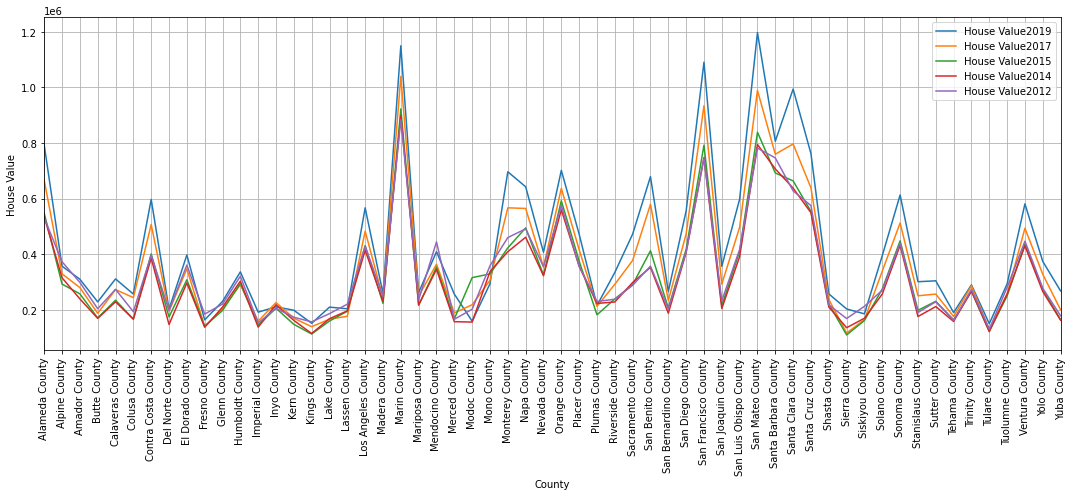

In [31]:
x_values=np.arange(0,len(counties),1)
county_combined_house_value=county_combined[["House Value2019","House Value2017",
                                             "House Value2015","House Value2014","House Value2012"]]
county_combined_house_value.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,7))
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("House Value")
plt.tight_layout()
plt.plot()

### *Change in Monthly Owner Cost in CA counties in years*

[]

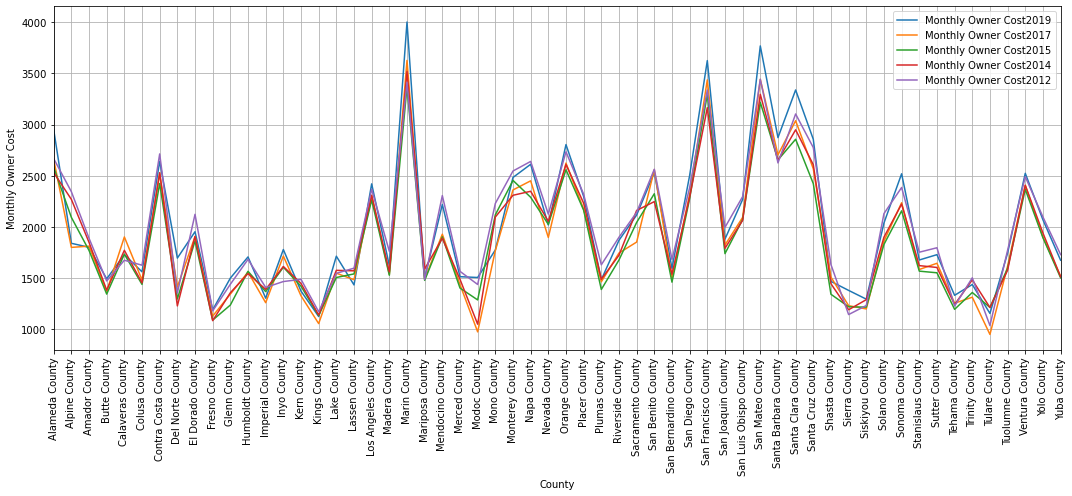

In [32]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Owner Cost2019","Monthly Owner Cost2017",
                                             "Monthly Owner Cost2015","Monthly Owner Cost2014",
                                             "Monthly Owner Cost2012"]]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,7))
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Owner Cost")
plt.tight_layout()
plt.plot()

### *Change in monthly rent in CA counties in years*

[]

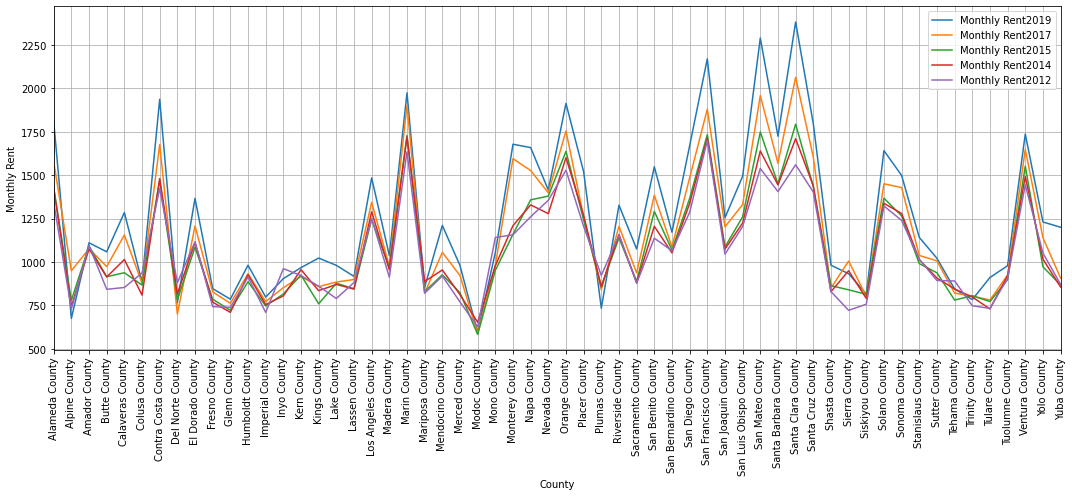

In [33]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Rent2019",'Monthly Rent2017','Monthly Rent2015',
                                              'Monthly Rent2014','Monthly Rent2012']]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,grid=True,figsize=(15,7))
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Rent")
plt.tight_layout()
plt.plot()